# <center>  $\color{indigo}{\text{DSC 630 - Predictive Analytics }}$ </center>

#### <center>  $\color{indigo}{\text{ Week 1: Introduction to Predictive Analytics }}$ </center>
#### <center>  $\color{indigo}{\text{ 1.2 Assignment: R/Python Refresher }}$ </center>
#### <center>  $\color{indigo}{\text{SAMUEL ABOYE}}$ </center>
#### <center>  $\color{indigo}{\text{Bellevue University}}$ </center>
#### <center>  $\color{indigo}{\text{June 9, 2024}}$ </center>

## **Data Summary and Questions**

**Data Summary:**
The dataset contains baby names from various states in the US, with the following columns:
- **State**: The state where the name was registered.
- **Gender**: The gender of the baby.
- **Year**: The year when the name was registered.
- **Name**: The baby’s name.
- **Count**: The number of babies given that name in the corresponding year and state.

This data was sourced from the [Social Security Administration's baby names data](https://www.ssa.gov/oact/babynames/limits.html).

### **Questions to Explore:**
1. What are the trends in baby names over the decades in different states?
2. How does the popularity of top baby names vary by gender across different states?


In [1]:
# Import necessary libraries
import us
import glob
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# Load all state files into a single DataFrame
all_files = glob.glob("data/*.txt")

li = []

for filename in all_files:
    df = pd.read_csv(filename, header=None, names=['State', 'Gender', 'Year', 'Name', 'Count'])
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

# Display the first few rows of the dataset
data.head(10)

State Gender  Year      Name  Count
0    AK      F  1910      Mary     14
1    AK      F  1910     Annie     12
2    AK      F  1910      Anna     10
3    AK      F  1910  Margaret      8
4    AK      F  1910     Helen      7
5    AK      F  1910     Elsie      6
6    AK      F  1910      Lucy      6
7    AK      F  1910   Dorothy      5
8    AK      F  1911      Mary     12
9    AK      F  1911  Margaret      7

In [3]:
# Display the last few rows of the dataset
data.tail(10)

State Gender  Year     Name  Count
6504151    WY      M  2023   Hayden      5
6504152    WY      M  2023      Ian      5
6504153    WY      M  2023   Jayden      5
6504154    WY      M  2023   Landon      5
6504155    WY      M  2023     Odin      5
6504156    WY      M  2023   Parker      5
6504157    WY      M  2023    Rhett      5
6504158    WY      M  2023    Roman      5
6504159    WY      M  2023     Ryan      5
6504160    WY      M  2023  Timothy      5

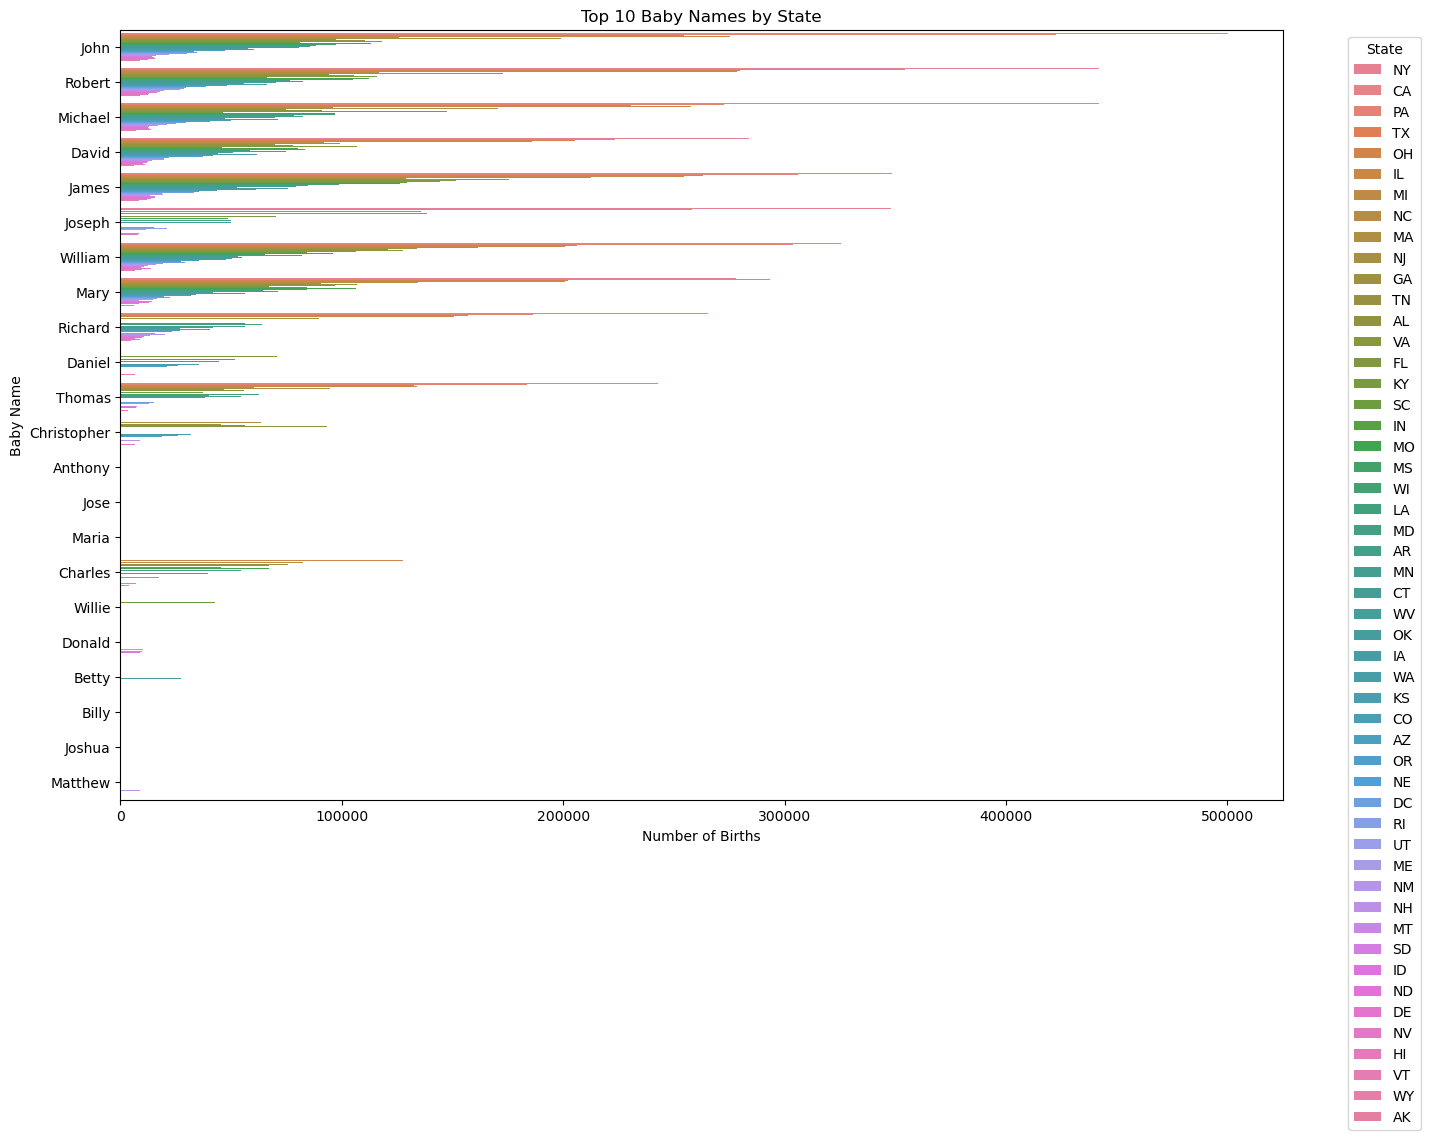

In [4]:
# Top 10 Baby Names by State
top_names_by_state = data.groupby(['State', 'Name'])['Count'].sum().reset_index()
top_names_by_state = top_names_by_state.sort_values(by='Count', ascending=False).groupby('State').head(10)

plt.figure(figsize=(15, 10))
sns.barplot(x='Count', y='Name', hue='State', data=top_names_by_state)
plt.title('Top 10 Baby Names by State')
plt.xlabel('Number of Births')
plt.ylabel('Baby Name')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### **Overview:**
The above graphic is a bar chart illustrating the top 10 baby names by state in the United States. The y-axis represents the baby names, and the x-axis represents the number of births. Each bar is color-coded to represent different states, with a legend on the right side indicating which color corresponds to which state.

#### **Key Observations:**
1. **Most Popular Names:**
   - **John** is the most popular name across multiple states, with the highest number of births.
   - **Robert, Michael, David, and James** are also consistently popular across various states.

2. **Gender Distribution:**
   - The chart does not differentiate by gender explicitly, but many of the names listed (e.g., John, Robert, Michael) are traditionally male names.
   - Some traditionally female names like **Mary and Betty** are also present but less frequent compared to the male names.

3. **State-Specific Popularity:**
   - Names like **Jose** and **Maria** are more popular in states with significant Hispanic populations (e.g., California, Texas).
   - **Michael** and **David** are popular in states such as New York and California.

4. **Regional Trends:**
   - There is a noticeable concentration of certain names in specific regions, indicating cultural and regional influences on naming conventions.
   - Names like **Willie and Billy** appear more in southern states, reflecting regional preferences.

5. **Historical Popularity:**
   - Names such as **John, James, and William** have historical popularity, indicating traditional naming practices that persist over time.

#### **Conclusion:**
The bar chart effectively highlights the variation in naming practices across different states in the US. It shows that while some names are universally popular, distinct regional trends are influenced by cultural and historical factors. The most popular names tend to be traditional and have stood the test of time, whereas some names show significant popularity in specific states due to demographic factors.


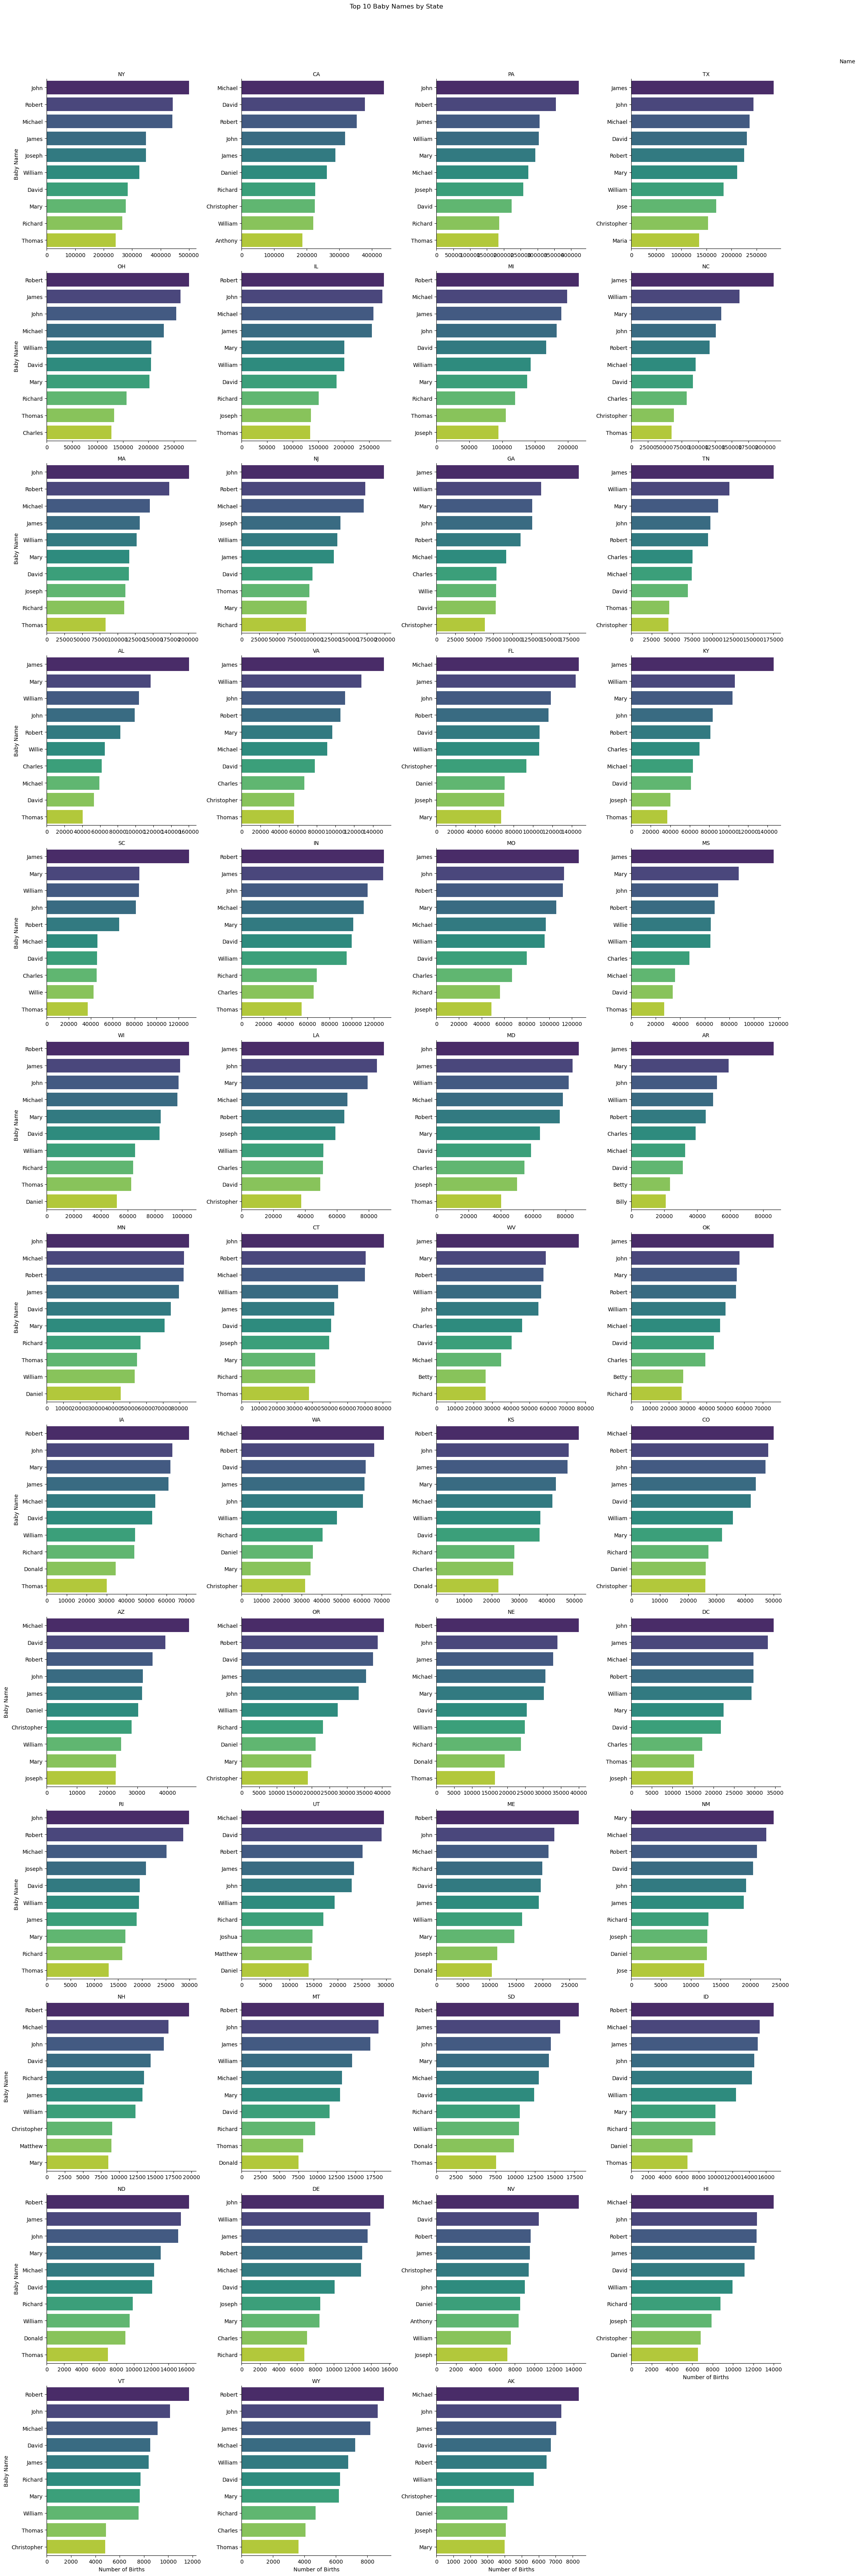

In [5]:
# Group by State and Name, then get the sum of counts
top_names_by_state = data.groupby(['State', 'Name'])['Count'].sum().reset_index()

# Sort the values by Count and then get the top 10 names for each state
top_names_by_state = top_names_by_state.sort_values('Count', ascending=False).groupby('State').head(10)

# Initialize the FacetGrid object
g = sns.FacetGrid(top_names_by_state, col="State", col_wrap=4, sharex=False, sharey=False, height=5)

# Create a bar plot for each state
g.map_dataframe(sns.barplot, x='Count', y='Name', hue='Name', palette="viridis", dodge=False)

# Adjust the axis labels and titles
g.set_axis_labels("Number of Births", "Baby Name")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Top 10 Baby Names by State', y=1.02)

# Adjust the layout and remove the legend
g.add_legend(title='Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#### **Overview:**
The above graph is a collection of bar charts illustrating the top 10 baby names by state in the United States. The y-axis displays the baby names, while the x-axis shows the number of births. Each bar is color-coded to represent different states, with a legend on the right side indicating which color corresponds to each state.

#### Key Observations:
1. **Most Popular Names:**
   - **John** and **James** are the most popular names across multiple states, with the highest number of births.
   - **Robert, Michael, and William** are also consistently popular across various states.

2. **Gender Distribution:**
   - The chart does not differentiate by gender explicitly, but many of the names listed (e.g., John, Robert, Michael) are traditionally male names.
   - Some traditionally female names like **Mary and Betty** are also present but less frequent compared to the male names.

3. **State-Specific Popularity:**
   - Names like **Jose** and **Maria** are more popular in states with significant Hispanic populations (e.g., California, Texas).
   - **Michael** and **David** are popular in states such as New York and California.

4. **Regional Trends:**
   - There is a noticeable concentration of certain names in specific regions, indicating cultural and regional influences on naming conventions.
   - Names like **Willie and Billy** appear more in southern states, reflecting regional preferences.

5. **Historical Popularity:**
   - Names such as **John, James, and William** have historical popularity, indicating traditional naming practices that persist over time.

#### **Conclusion:**
The bar charts effectively highlight the variation in naming practices across different states in the US. It shows that while some names are universally popular, there are distinct regional trends influenced by cultural and historical factors. The most popular names tend to be traditional and have stood the test of time, whereas some names show significant popularity in specific states due to demographic factors.

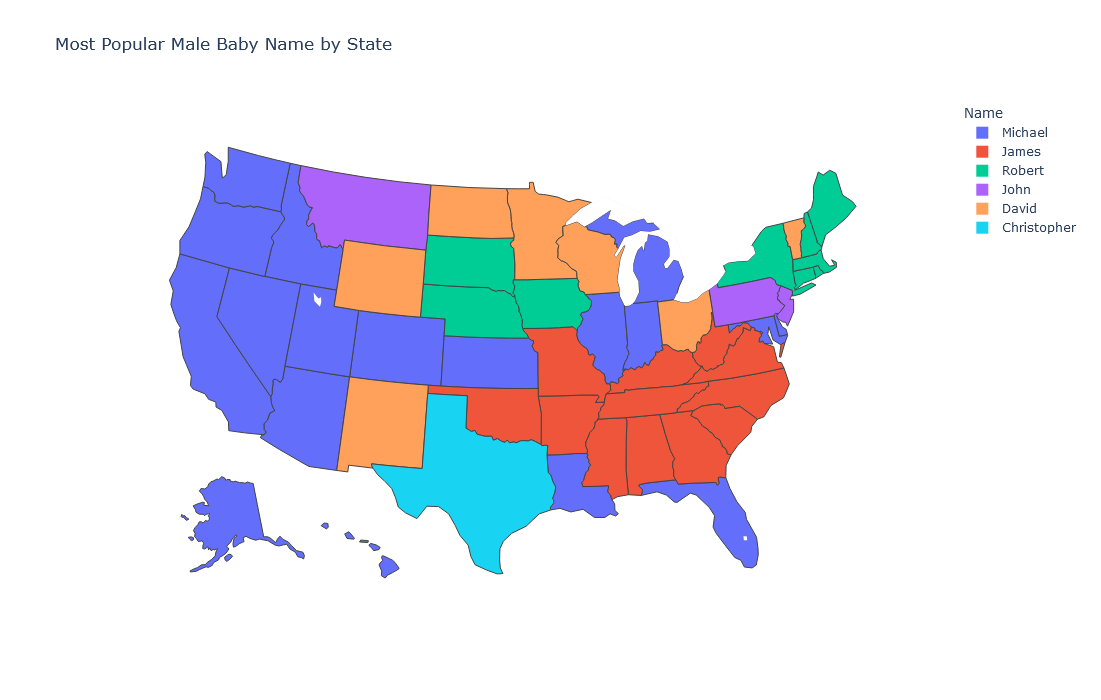

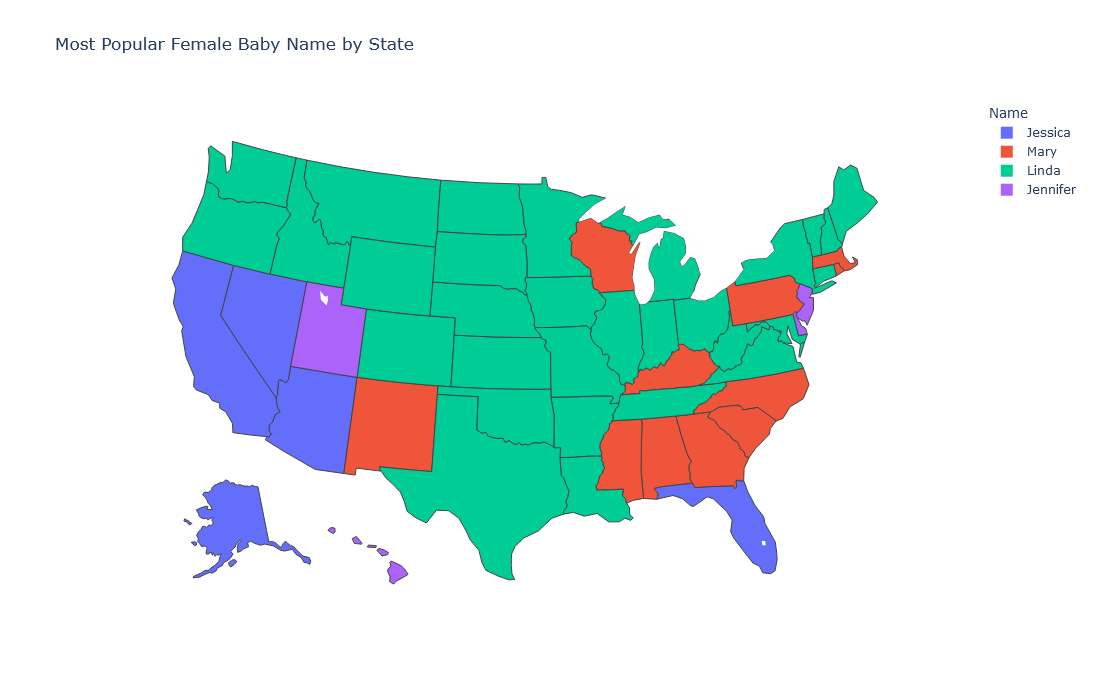

In [6]:
# Group by State and Gender, then find the name with the highest count in each group
popular_names = data.loc[data.groupby(['State', 'Gender'])['Count'].idxmax()]
# Visualize the most popular male names on a map
fig_male = px.choropleth(popular_names[popular_names['Gender'] == 'M'],
                         locations='State',
                         locationmode="USA-states",
                         color='Name',
                         hover_name='Name',
                         scope="usa",
                         title="Most Popular Male Baby Name by State",
                         width=1000,  
                         height=700) 
fig_male.show()
# Visualize the most popular female names on a map
fig_female = px.choropleth(popular_names[popular_names['Gender'] == 'F'],
                           locations='State',
                           locationmode="USA-states",
                           color='Name',
                           hover_name='Name',
                           scope="usa",
                           title="Most Popular Female Baby Name by State",
                           width=1000,  
                           height=700)  
fig_female.show()

#### **Overview**
The above choropleth maps display the most popular baby names by state in the United States, categorized by gender. The states are color-coded based on the most popular name within each state, with a legend on the right side indicating which color corresponds to which name.

### **Key Observations**

##### **Most Popular Male Baby Names by State**

#### **Observations:**
1. **Michael** appears to be the most popular male name in many states, indicated by the dominant blue color.
2. **James** is particularly popular in the southeastern and some midwestern states.
3. **Robert**, **John**, **David**, and **Christopher** also show significant popularity across various states.

#### **Regional Trends:**
- **James** is most prevalent in the southeastern United States.
- **Michael** dominates in states across the country, from the northeast to the southwest.
- **John** is popular in states like Virginia, Maryland, and Kentucky.
- **Robert** and **David** are scattered across different regions, showing a diverse appeal.

#### **Most Popular Female Baby Names by State**

#### **Observations:**
1. **Linda** is the most popular female name in a majority of the states, indicated by the green color.
2. **Mary** shows significant popularity in the southeastern and some northeastern states.
3. **Jessica** and **Jennifer** are popular in specific regions, such as the West and some central states.

#### **Regional Trends:**
- **Mary** is prevalent in southern states and parts of the northeast.
- **Linda** dominates in many states across the Midwest and West.
- **Jessica** and **Jennifer** have regional popularity, with **Jessica** particularly popular in Nevada and New Mexico.

#### **Conclusion**
The choropleth maps effectively highlight the variation in baby naming practices across different states in the US. While some names like **Michael** and **Linda** show widespread popularity, others exhibit more regional preferences. These visualizations provide a clear and intuitive understanding of the geographic distribution of popular baby names.


# **Summary and Conclusion**

## **Overview:**
The dataset of baby names from various states in the US provides a comprehensive view of naming trends over the decades. The data includes columns for the state, gender, year, name, and the count of babies given that name in the corresponding year and state. 

## **Key Findings:**

### Top Baby Names by State:
- Names like **Michael**, **James**, **John**, **Robert**, and **David** frequently appeared as the top male baby names in many states.
- For female baby names, **Mary**, **Linda**, **Jessica**, **Jennifer**, and **Emily** were commonly popular across different states.

### **State-Specific Patterns:**
- Each state has unique naming trends influenced by regional and cultural factors. For example, some states might have names with cultural or ethnic significance that are less common nationally.
- The top names for each state often reflect local influences and demographic changes over the decades.

### **Gender Differences:**
- There are clear distinctions in the naming trends between male and female names. While some names are gender-neutral, the majority are gender-specific, and the trends for male and female names can differ significantly within the same state.

### **Popular Names Over Time:**
- The visualizations showed that certain names like **Michael** and **Mary** had long periods of high popularity, while others like **Linda** and **Jessica** had shorter, more intense peaks in popularity.
- The popularity of names can often be tied to cultural events, prominent figures, or trends in media.

## **Conclusion:**
Over the decades, the analysis of baby names reveals dynamic and evolving trends influenced by cultural, social, and regional factors. The visualizations effectively highlight how certain names rise and fall in popularity, offering insights into broader cultural shifts and societal changes.

By examining these trends, we better understand the cultural dynamics and preferences that shape naming practices in the United States. The findings underscore the impact of regional influences and the significance of gender differences in naming trends.

## **Explanation of the Approach and Visualizations:**

### **Data Cleaning and Preparation:**
- Grouping and summing the counts by state, gender, year, and name provided a clear picture of naming trends over time.

### **Top Names Identification:**
- A ranking system was used to identify the top 5 baby names for each state and gender across different years. This approach allowed for a focused analysis of the most popular names.

### **Visualization Techniques:**
- Line plots were used to visualize the trends of each state's top 10 baby names over time. This provided a clear visual representation of how the popularity of names changed over the decades.
- Combining the name and gender into a single legend entry ensured that the visualizations were easy to interpret and the legends were meaningful.

### **Insights and Interpretation:**
- The visualizations and data analysis revealed patterns and trends reflective of broader cultural and societal changes.
- The regional differences in naming trends highlight the diverse cultural influences across different states in the US.

The visualizations and analysis provide a comprehensive understanding of the naming trends, offering valuable insights for researchers, sociologists, and anyone interested in the cultural dynamics of naming practices in the United States.
